In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# x_train = pd.read_csv('../processed_data/pre_x_train.csv')
# x_test = pd.read_csv('../processed_data/pre_x_test.csv')
x_train = pd.read_csv('../processed_data/nlin_train_added_10_all.csv')
x_test = pd.read_csv('../processed_data/nlin_test_added_10_all.csv')
y_train = pd.read_csv('../processed_data/y_train.csv')
x_test_id = pd.read_csv('../raw_data/test.csv',usecols=['ID'])

In [15]:
params = {
    'eta': 0.02,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': 100.0, # base prediction = mean(target)
    'silent': 1
}
d_train = xgb.DMatrix(x_train,y_train)
watchlist = [(d_train, 'train')]

d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.02
params['max_depth'] = 3
params['base_score'] = y_train['y'].mean()
d_train = xgb.DMatrix(x_train,y_train)
watchlist = [(d_train, 'train')]

d_test = xgb.DMatrix(x_test)

In [16]:
bst = xgb.train(params, d_train ,300, watchlist,early_stopping_rounds=50, verbose_eval=10)

[0]	train-rmse:12.5533
Will train until train-rmse hasn't improved in 50 rounds.
[10]	train-rmse:11.3384
[20]	train-rmse:10.4459
[30]	train-rmse:9.80318
[40]	train-rmse:9.35222
[50]	train-rmse:9.03437
[60]	train-rmse:8.81435
[70]	train-rmse:8.65706
[80]	train-rmse:8.54176
[90]	train-rmse:8.45541
[100]	train-rmse:8.38826
[110]	train-rmse:8.33645
[120]	train-rmse:8.29328
[130]	train-rmse:8.25458
[140]	train-rmse:8.22294
[150]	train-rmse:8.1941
[160]	train-rmse:8.16603
[170]	train-rmse:8.14485
[180]	train-rmse:8.12491
[190]	train-rmse:8.10568
[200]	train-rmse:8.08268
[210]	train-rmse:8.05154
[220]	train-rmse:8.03161
[230]	train-rmse:8.01755
[240]	train-rmse:7.99948
[250]	train-rmse:7.98249
[260]	train-rmse:7.96982
[270]	train-rmse:7.95843
[280]	train-rmse:7.9453
[290]	train-rmse:7.93373
[300]	train-rmse:7.91856
[310]	train-rmse:7.89556
[320]	train-rmse:7.88686
[330]	train-rmse:7.87798
[340]	train-rmse:7.86267
[350]	train-rmse:7.85124
[360]	train-rmse:7.82645
[370]	train-rmse:7.81647
[380]

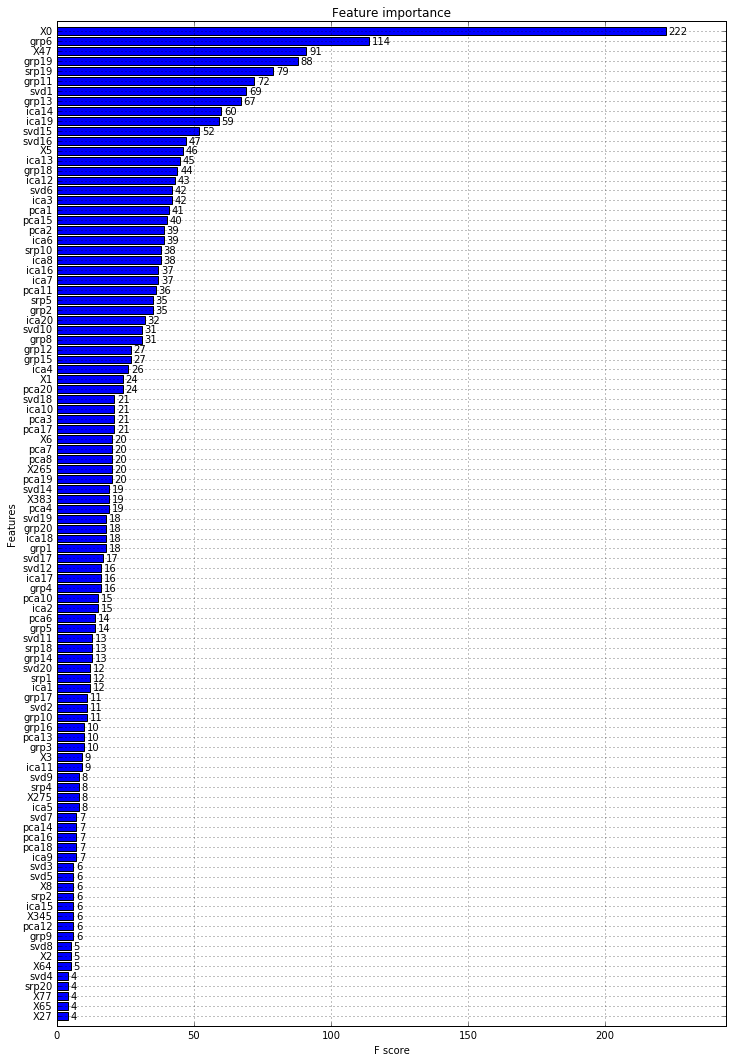

In [6]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(bst, max_num_features=100, height=0.8, ax=ax)
plt.show()

In [17]:
y_test = bst.predict(d_test)
sub = pd.DataFrame()
sub['ID'] = x_test_id['ID']
sub['y'] = y_test
sub.to_csv('../output/dimred15.csv', index=False)